## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,#country+name,#country+code,#date,#total+vaccinations,NaN,NaN,NaN,#total+vaccinations+daily,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-22,0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0


In [3]:
df = df.drop(0) #dropping 1st row

In [4]:
#Converting to date time format
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
df.head()

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
2021-02-25,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
2021-02-26,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0


### Replacing NaN with zero since forecasting cannot be done by dropping those values or with NaN's

In [5]:
df = df.fillna(0)

### Creating a subset as we are only interested in forecasting number of daily vaccinations in India

In [6]:
ndf = df.loc[df["location"] == "India"]

In [7]:
ndf.head()

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,,,
2021-01-15,India,IND,0,0.0,0.0,0.0,0,0.00,0.00,0.0,0.0
2021-01-16,India,IND,191181,191181.0,0.0,191181.0,191181,0.01,0.01,0.0,139.0
2021-01-17,India,IND,224301,224301.0,0.0,33120.0,112150,0.02,0.02,0.0,81.0
2021-01-18,India,IND,454049,454049.0,0.0,229748.0,151350,0.03,0.03,0.0,110.0
2021-01-19,India,IND,674835,674835.0,0.0,220786.0,168709,0.05,0.05,0.0,122.0


In [8]:
dose = ndf["daily_vaccinations"].values

### Checking which ARIMA model is the best fit

In [9]:
fit = auto_arima(ndf["daily_vaccinations"], trace = True, suppress_warnings = True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3759.370, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3803.594, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3785.765, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3793.198, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3805.102, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3768.725, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3773.993, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3755.684, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3765.637, Time=0.18 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3760.530, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3758.406, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3768.511, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3759.530, Time=0.27 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3757.999, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  145
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1871.180
Date:                Wed, 09 Jun 2021   AIC                           3754.359
Time:                        19:25:52   BIC                           3772.178
Sample:                             0   HQIC                          3761.600
                                - 145                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4093      0.107     -3.839      0.000      -0.618      -0.200
ar.L2         -0.1033      0.113     -0.911      0.362      -0.325       0.119
ar.L3          0.5916      0.063      9.361      0.000       0.468       0.715
ma.L1          0.7227      0.115      6.293      0.000       0.498       0.948
ma.L2          0.6979      0.106      6.587      0.000       0.490       0.906
sigma2      1.261e+10   3.74e-12   3.37e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.07
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              10.28   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.45e+37. Standard errors may be unstable.
"""

In [10]:
days = int(input("Enter no. of days for forecasting daily vaccination :"))

Enter no. of days for forecasting daily vaccination :98


In [11]:
f, confint = fit.predict(n_periods = days, return_conf_int=True)
f_index = np.arange(len(dose), len(dose)+ days)

forecast = pd.Series(f, index = f_index)
ls = pd.Series(confint[:, 0], index = f_index)
us = pd.Series(confint[:, 1], index = f_index)

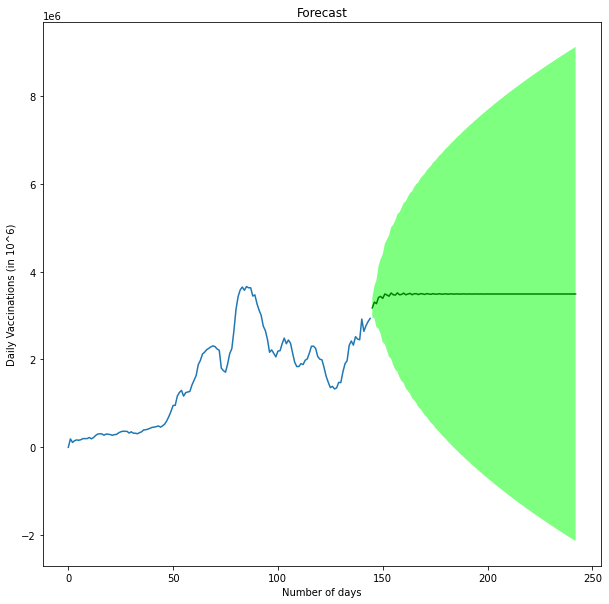

In [12]:
plt.figure(figsize = (10,10))
plt.plot(dose)
plt.plot(forecast, color='green')
plt.fill_between(ls.index, ls, us, alpha=0.5, facecolor='lime')
plt.title("Forecast")
plt.xlabel("Number of days")
plt.ylabel("Daily Vaccinations (in 10^6)")
plt.show()

## Conclusion :

### Green line shows the forecasted value for upcoming days while the green shaded region gives us the upper and lower limit of the same. Also the above graph represents people getting vaccinated all over India and not just to one particular state.